<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 5th exercise: <font color="#C70039">Work with Robust Random Cut Forest (RRCF) algorithms for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Name: <a href="https://www.gernotheisenberg.de/">Rubaiya Kabir Pranti</a>
* Matriculation Number: <a href="https://www.gernotheisenberg.de/"> 11146364</a>
* Date:   16.01.2024

<img src="https://docs.aws.amazon.com/sagemaker/latest/dg/images/RCF2.jpg" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too.
* This applies to all exercises throughout this course.

* <font color=red>Install the RRCF package per pip:_$ pip install rrcf_</font>

The codes of this exercise is based on the codebase of the following team:

_M. Bartos, A. Mullapudi, & S. Troutman, rrcf: Implementation of the Robust Random Cut Forest algorithm for anomaly detection on streams , in: Journal of Open Source Software, The Open Journal, Volume 4, Number 35. 2019_

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for learning Amazon's Robust Random Cut Forest algorithm and its implementation for detecting anomalies. The Robust Random Cut Forest Algorithm for anomaly detection was invented by Guha et al. in 2016. Further reading can be found here (&rarr; <a href="http://proceedings.mlr.press/v48/guha16.pdf">paper</a>):

_S. Guha, N. Mishra, G. Roy, & O. Schrijvers, Robust random cut forest based anomaly detection on streams, in Proceedings of the 33rd International conference on machine learning, New York, NY, 2016 (pp. 2712-2721)_.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and apply the RRCF to them.
5. interpret the results in writing.
-----------------------------------------------------------------------------------

## Robust random cut trees (part I)
A RRCT can be instantiated from a point set. Points can also be added and removed from an RRCT.

In [1]:
import numpy as np
import pandas as pd
import rrcf

In [2]:
!pip install rrcf

#### A (robust) random cut tree can be instantiated from a point set (n x d)

## 1. Admission Prediction Dataset

In [3]:
# loading csv dataset
df1 = pd.read_csv('C:/Users/rubai/AML/my_datasets/normally_dist/Admission_Predict.csv')

In [4]:
X1 = df1.to_numpy()

In [5]:
X1

array([[  1.  , 337.  , 118.  , ...,   9.65,   1.  ,   0.92],
       [  2.  , 324.  , 107.  , ...,   8.87,   1.  ,   0.76],
       [  3.  , 316.  , 104.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [398.  , 330.  , 116.  , ...,   9.45,   1.  ,   0.91],
       [399.  , 312.  , 103.  , ...,   8.78,   0.  ,   0.67],
       [400.  , 333.  , 117.  , ...,   9.66,   1.  ,   0.95]])

In [6]:
tree1 = rrcf.RCTree(X1)
# operates by constructing a forest of binary trees>Random Cut Trees where anomalies are points that have a large codisp/ 
#collusive displacement score which generally indicates that they are far from the other points in the data distribution

print(tree1)

─+
 ├───+
 │   ├───+
 │   │   ├───+
 │   │   │   ├───+
 │   │   │   │   ├───+
 │   │   │   │   │   ├───+
 │   │   │   │   │   │   ├───+
 │   │   │   │   │   │   │   ├───+
 │   │   │   │   │   │   │   │   ├──(4)
 │   │   │   │   │   │   │   │   └──(2)
 │   │   │   │   │   │   │   └───+
 │   │   │   │   │   │   │       ├──(3)
 │   │   │   │   │   │   │       └───+
 │   │   │   │   │   │   │           ├──(6)
 │   │   │   │   │   │   │           └──(1)
 │   │   │   │   │   │   └───+
 │   │   │   │   │   │       ├───+
 │   │   │   │   │   │       │   ├───+
 │   │   │   │   │   │       │   │   ├───+
 │   │   │   │   │   │       │   │   │   ├───+
 │   │   │   │   │   │       │   │   │   │   ├──(28)
 │   │   │   │   │   │       │   │   │   │   └──(37)
 │   │   │   │   │   │       │   │   │   └──(57)
 │   │   │   │   │   │       │   │   └──(58)
 │   │   │   │   │   │       │   └───+
 │   │   │   │   │   │       │       ├───+
 │   │   │   │   │   │       │       │   ├───+
 │   │   │   │   │   │ 

## A random cut tree can also be instantiated with no points
The points can be inserted and removed afterwards.

In [7]:
tree = rrcf.RCTree()

#Inserting points at index i
for i in range(6):
    x = np.random.randn(2)
    #print("x=",x)
    tree.insert_point(x, index=i)

print(tree)

#Deleting points at index i 
tree.forget_point(2)

print(tree)

─+
 ├───+
 │   ├───+
 │   │   ├──(0)
 │   │   └──(2)
 │   └──(1)
 └───+
     ├───+
     │   ├──(4)
     │   └──(3)
     └──(5)

─+
 ├───+
 │   ├──(0)
 │   └──(1)
 └───+
     ├───+
     │   ├──(4)
     │   └──(3)
     └──(5)



## Robust random cut trees (part II)
### Anomaly score
The likelihood that a point is an outlier is measured by the so-called <font color=red>collusive displacement (CoDisp)</font> score: if including a new point significantly changes the model's complexity (i.e. bit depth), then that point is more likely to be an outlier.

In [8]:
# the mean and standard deviation for each column
means = np.mean(X1, axis=0)
stds = np.std(X1, axis=0)
# an inlier - similar to the mean values
inlier = means
# an outlier - significantly different from the mean
# adding 3 standard deviations to the mean
outlier = means + 10 * stds

# the inlier and outlier
print("Inlier:", inlier)
print("Outlier:", outlier)

Inlier: [200.5      316.8075   107.41       3.0875     3.4        3.4525
   8.598925   0.5475     0.72435 ]
Outlier: [1355.19692993  431.40045081  168.02922137   14.51047575   13.45609268
   12.42603749   14.55463734    5.52488636    2.14865957]


In [9]:
# adding inlier and outlier to the dataset
X1_expanded = np.vstack([X1, inlier, outlier])
# manuaaly specifying indices for each point
indices1 = range(len(X1_expanded))
# a new RCTree with the expanded dataset and specified indices
tree1_e = rrcf.RCTree(X1_expanded, index_labels=indices1)
# indices for inlier and outlier
inlier_index = len(X1_expanded) - 2
outlier_index = len(X1_expanded) - 1 #outlier was added last, so its index is the length of the dataset minus 1.

# codisp (anomaly) scores
print("Inlier codisp score:", tree1_e.codisp(inlier_index))
print("Outlier codisp score:", tree1_e.codisp(outlier_index))

Inlier codisp score: 1.358974358974359
Outlier codisp score: 401.0


Outlier codisp score: 11.0 > Inlier codisp score: 2.409090909090909

As a rule of thumb:
* scores of max(abs(3 * stdev)) are ok
* higher scores are an indication of an outlier.

## Robust random cut trees (part III)
### Batch anomaly detection
This example shows how a robust random cut forest can be used to detect outliers in a batch setting. As you already know, outliers correspond to a larger CoDisp score.

In [10]:
X1.shape

(400, 9)

In [11]:
'''
In order to create a random forest, we simply create a list of RCTrees, 
with each RCTree constructed from a random sample of the input dataset. 
Let's create a random forest with 100 trees, each containing 256 points 
from the original sample.
'''
# parameters
n, d = X1.shape

num_trees = 100
tree_size = 128

X1[:200,0] = 5
X1[200:400,0] = -5
X1 += 0.01*np.random.randn(*X1.shape)
#a small amount of random noise to the entire dataset
# noise is drawn from a normal distribution (mean = 0, standard deviation = 0.01)

print(x)

[ 1.64517873 -0.04323653]


In [12]:
# constructing forest
forest = []
while len(forest) < num_trees:
    # random subsets of points uniformly from point set
    ixs = np.random.choice(n, size=(n // tree_size, tree_size), replace=False)
    # adding sampled trees to forest
    trees = [rrcf.RCTree(X1[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)

In [13]:
'''
Finally, to determine outliers we compute the average codisp 
over all trees for each point in the original sample.
'''
# average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index

'''Now, print the average codisp for each set of points.'''
# for the inlier points:
print("AVG_codisp[inlier points]=",round(avg_codisp[:-10].mean(),2))
# for the outlier points:
print("AVG_codisp[outlier points]=",round(avg_codisp[-10:].mean(),2))

AVG_codisp[inlier points]= 4.64
AVG_codisp[outlier points]= 3.37


## <font color="FFC300">Comments</font>:
### For Admission Prediction Dataset, from Ex1 results and above results of average CoDisp results, we can say that  the anomalies are not very anomalous and  they are too similar to normal points 

In [15]:
'''
Note that the outlier points again have a larger codisp. 
To classify the original points into inlier and outlier classes, 
perform a simple threshold test on the codisp result.
'''
# identifying outliers
is_outlier = avg_codisp > avg_codisp.quantile(0.99)
# identifying inliers as not being outliers
is_inlier = avg_codisp <= avg_codisp.quantile(0.99)

# the result of outlier
print("Is outlier?\n", is_outlier)
outlier_indices = is_outlier[is_outlier].index
print("Indices of outliers:", outlier_indices)
# the result of inlier
print("Is inlier?\n", is_inlier)
inlier_indices = is_inlier[is_inlier].index
print("Indices of inliers:", inlier_indices)

# the actual CoDisp scores of the outliers
outlier_scores = avg_codisp[is_outlier]
print("CoDisp scores of outliers:\n", outlier_scores)
# the actual CoDisp scores of the inliers
inlier_scores = avg_codisp[is_inlier]
print("CoDisp scores of inliers:\n", inlier_scores)

Is outlier?
 0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool
Indices of outliers: Index([117, 297, 368, 377], dtype='int32')
Is inlier?
 0      True
1      True
2      True
3      True
4      True
       ... 
395    True
396    True
397    True
398    True
399    True
Length: 400, dtype: bool
Indices of inliers: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399],
      dtype='int32', length=396)
CoDisp scores of outliers:
 117    24.690354
297    18.362164
368    17.004020
377    23.897477
dtype: float64
CoDisp scores of inliers:
 0      6.360320
1      3.061214
2      2.847085
3      2.864909
4      3.365722
         ...   
395    2.643061
396    3.608123
397    3.484079
398    2.414611
399    4.141853
Length: 396, dtype: float64


## <font color="FFC300">Comments</font>:
### Individual codisp scores, pinpointing the specific location of potential anomalies in our dataset to identify and investigate unusual data points 

## 2. Boston Housing Dataset

In [16]:
# loading csv dataset
df2 = pd.read_csv('C:/Users/rubai/AML/my_datasets/normally_dist/HousingData.csv')
df2 = df2.dropna()

In [17]:
X2 = df2.to_numpy()

In [18]:
tree2 = rrcf.RCTree(X2)

print(tree2)

─+
 ├───+
 │   ├───+
 │   │   ├───+
 │   │   │   ├───+
 │   │   │   │   ├───+
 │   │   │   │   │   ├──(126)
 │   │   │   │   │   └──(121)
 │   │   │   │   └───+
 │   │   │   │       ├──(156)
 │   │   │   │       └───+
 │   │   │   │           ├───+
 │   │   │   │           │   ├──(133)
 │   │   │   │           │   └───+
 │   │   │   │           │       ├──(124)
 │   │   │   │           │       └───+
 │   │   │   │           │           ├──(137)
 │   │   │   │           │           └──(135)
 │   │   │   │           └───+
 │   │   │   │               ├───+
 │   │   │   │               │   ├───+
 │   │   │   │               │   │   ├──(125)
 │   │   │   │               │   │   └──(136)
 │   │   │   │               │   └───+
 │   │   │   │               │       ├───+
 │   │   │   │               │       │   ├──(129)
 │   │   │   │               │       │   └──(127)
 │   │   │   │               │       └───+
 │   │   │   │               │           ├──(123)
 │   │   │   │               │   

In [19]:
# the mean and standard deviation for each column
means = np.mean(X2, axis=0)
stds = np.std(X2, axis=0)
# an inlier - similar to the mean values
inlier = means
#an outlier - significantly different from the mean
#adding 3 standard deviations to the mean
outlier = means + 20 * stds

#the inlier and outlier
print("Inlier:", inlier)
print("Outlier:", outlier)

Inlier: [3.69013617e+00 1.14606599e+01 1.10008629e+01 6.85279188e-02
 5.53215482e-01 6.28001523e+00 6.89327411e+01 3.80526802e+00
 9.40355330e+00 4.06431472e+02 1.85375635e+01 3.58490939e+02
 1.27691117e+01 2.23596447e+01]
Outlier: [1.87504875e+02 4.89933951e+02 1.48992685e+02 5.12152082e+00
 2.81259269e+00 2.02219863e+01 6.25998556e+02 4.57233943e+01
 1.81853311e+02 3.76840525e+03 6.18117344e+01 2.14188932e+03
 1.58752110e+02 2.04987024e+02]


In [20]:
#inlier and outlier to the dataset
X2_expanded = np.vstack([X2, inlier, outlier])
#specify indices for each point
indices2 = range(len(X2_expanded))
#a new RCTree with the expanded dataset and specified indices
tree2_e = rrcf.RCTree(X2_expanded, index_labels=indices2)
#indices for inlier and outlier
inlier_index = len(X2_expanded) - 2
outlier_index = len(X2_expanded) - 1

#computing and print their codisp (anomaly) scores
print("Inlier codisp score:", tree2_e.codisp(inlier_index))
print("Outlier codisp score:", tree2_e.codisp(outlier_index))

X2_expanded.shape

Inlier codisp score: 2.0
Outlier codisp score: 395.0


(396, 14)

In [21]:
X2.shape

(394, 14)

In [22]:
'''
In order to create a random forest, we simply create a list of RCTrees, 
with each RCTree constructed from a random sample of the input dataset. 
Let's create a random forest with 100 trees, each containing 256 points 
from the original sample.
'''
# Set parameters
n, d = X2.shape

num_trees = 100
tree_size = 128

X2[:197,0] = 5
X2[197:394,0] = -5
X2 += 0.01*np.random.randn(*X2.shape)
#a small amount of random noise to the entire dataset
# noise is drawn from a normal distribution (mean = 0, standard deviation = 0.01)

print(x)


# Construct forest
forest = []
while len(forest) < num_trees:
    # Select random subsets of points uniformly from point set
    ixs = np.random.choice(n, size=(n // tree_size, tree_size),
                           replace=False)
    # Add sampled trees to forest
    trees = [rrcf.RCTree(X2[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)

[ 1.64517873 -0.04323653]


In [23]:
'''
Finally, to determine outliers we compute the average codisp 
over all trees for each point in the original sample.
'''
# compute average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index

'''Now, print the average codisp for each set of points.'''
# for the inlier points:
print("AVG_codisp[inlier points]=",round(avg_codisp[:-10].mean(),2))
# for the outlier points:
print("AVG_codisp[outlier points]=",round(avg_codisp[-10:].mean(),2))

AVG_codisp[inlier points]= 5.42
AVG_codisp[outlier points]= 3.7


## <font color="FFC300">Comments</font>:
### For housing dataset, from Ex1 results and above results of average CoDisp results, we can say that  the anomalies are not very anomalous and  they are too similar to normal points 

In [24]:
'''
Note that the outlier points again have a larger codisp. 
To classify the original points into inlier and outlier classes, 
perform a simple threshold test on the codisp result.
'''
# identifying outliers
is_outlier = avg_codisp > avg_codisp.quantile(0.99)
# identifying inliers as not being outliers
is_inlier = avg_codisp <= avg_codisp.quantile(0.99)

# the result of outlier
print("Is outlier?\n", is_outlier)
outlier_indices = is_outlier[is_outlier].index
print("Indices of outliers:", outlier_indices)
# the result of inlier
print("Is inlier?\n", is_inlier)
inlier_indices = is_inlier[is_inlier].index
print("Indices of inliers:", inlier_indices)

# the actual CoDisp scores of the outliers
outlier_scores = avg_codisp[is_outlier]
print("CoDisp scores of outliers:\n", outlier_scores)
# the actual CoDisp scores of the inliers
inlier_scores = avg_codisp[is_inlier]
print("CoDisp scores of inliers:\n", inlier_scores)

Is outlier?
 0      False
1      False
2      False
3      False
4      False
       ...  
389    False
390    False
391    False
392    False
393    False
Length: 394, dtype: bool
Indices of outliers: Index([28, 35, 100, 126], dtype='int32')
Is inlier?
 0      True
1      True
2      True
3      True
4      True
       ... 
389    True
390    True
391    True
392    True
393    True
Length: 394, dtype: bool
Indices of inliers: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       384, 385, 386, 387, 388, 389, 390, 391, 392, 393],
      dtype='int32', length=390)
CoDisp scores of outliers:
 28     20.032227
35     22.560104
100    21.126241
126    21.981346
dtype: float64
CoDisp scores of inliers:
 0      4.043112
1      3.937491
2      4.397198
3      3.824972
4      4.252752
         ...   
389    3.061943
390    3.828596
391    3.099335
392    4.539784
393    3.381439
Length: 390, dtype: float64


## <font color="FFC300">Comments</font>:
### Individual codisp scores, pinpointing the specific location of potential anomalies in our dataset to identify and investigate unusual data points 

## 3. Climate Dataset

In [25]:
# loading csv dataset
df3 = pd.read_csv('C:/Users/rubai/AML/my_datasets/not_normal/DailyDelhiClimateTrain.csv')
if df3.select_dtypes(include=[object]).shape[1] > 0: #getting and dropping columns that are not numeric
    df3 = df3.select_dtypes(exclude=[object])

In [26]:
X3 = df3.to_numpy()

tree3 = rrcf.RCTree(X3)
print(tree3)

─+
 ├───+
 │   ├───+
 │   │   ├───+
 │   │   │   ├───+
 │   │   │   │   ├──(1427)
 │   │   │   │   └──(1323)
 │   │   │   └──(1255)
 │   │   └───+
 │   │       ├───+
 │   │       │   ├───+
 │   │       │   │   ├───+
 │   │       │   │   │   ├───+
 │   │       │   │   │   │   ├──(759)
 │   │       │   │   │   │   └───+
 │   │       │   │   │   │       ├───+
 │   │       │   │   │   │       │   ├───+
 │   │       │   │   │   │       │   │   ├───+
 │   │       │   │   │   │       │   │   │   ├──(1425)
 │   │       │   │   │   │       │   │   │   └──(1424)
 │   │       │   │   │   │       │   │   └───+
 │   │       │   │   │   │       │   │       ├───+
 │   │       │   │   │   │       │   │       │   ├──(786)
 │   │       │   │   │   │       │   │       │   └──(1426)
 │   │       │   │   │   │       │   │       └──(1176)
 │   │       │   │   │   │       │   └──(93)
 │   │       │   │   │   │       └───+
 │   │       │   │   │   │           ├───+
 │   │       │   │   │   │           │   ├──

In [27]:
#the mean and standard deviation for each column
means = np.mean(X3, axis=0)
stds = np.std(X3, axis=0)
# Create an inlier - similar to the mean values
inlier = means
# Create an outlier - significantly different from the mean
# For example, adding 3 standard deviations to the mean
outlier = means + 50 * stds

# Print the inlier and outlier
print("Inlier:", inlier)
print("Outlier:", outlier)

Inlier: [  25.49552066   60.77170158    6.80220875 1011.10454759]
Outlier: [  392.77498388   898.96750719   234.80430085 10019.60550049]


In [28]:
# inlier and outlier to the dataset
X3_expanded = np.vstack([X3, inlier, outlier])
# indices for each point
indices3 = range(len(X3_expanded))
# a new RCTree with the expanded dataset and specified indices
tree3_e = rrcf.RCTree(X3_expanded, index_labels=indices3)
# indices for inlier and outlier
inlier_index = len(X3_expanded) - 2
outlier_index = len(X3_expanded) - 1

# computing and print their codisp (anomaly) scores
print("Inlier codisp score:", tree3_e.codisp(inlier_index))
print("Outlier codisp score:", tree3_e.codisp(outlier_index))

X3_expanded.shape

Inlier codisp score: 3.25
Outlier codisp score: 731.0


(1464, 4)

In [29]:
X3.shape

(1462, 4)

In [30]:
'''
In order to create a random forest, we simply create a list of RCTrees, 
with each RCTree constructed from a random sample of the input dataset. 
Let's create a random forest with 100 trees, each containing 256 points 
from the original sample.
'''
# Set parameters
n, d = X3.shape

num_trees = 100
tree_size = 128

X3[:75,0] = 5
X3[75:150,0] = -5
X3 += 0.01*np.random.randn(*X3.shape)
#a small amount of random noise to the entire dataset
# noise is drawn from a normal distribution (mean = 0, standard deviation = 0.01)

In [31]:
# constructing forest
forest = []
while len(forest) < num_trees:
    # random subsets of points uniformly from point set
    ixs = np.random.choice(n, size=(n // tree_size, tree_size), replace=False)
    # add sampled trees to forest
    trees = [rrcf.RCTree(X3[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)

In [32]:
'''
Finally, to determine outliers we compute the average codisp 
over all trees for each point in the original sample.
'''
# average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index

'''Now, print the average codisp for each set of points.'''
# for the inlier points:
print("AVG_codisp[inlier points]=",round(avg_codisp[:-10].mean(),2))
# for the outlier points:
print("AVG_codisp[outlier points]=",round(avg_codisp[-10:].mean(),2))

AVG_codisp[inlier points]= 5.76
AVG_codisp[outlier points]= 5.58


## <font color="FFC300">Comments</font>:
### For climate dataset, from Ex1 results and above results of average CoDisp results, we can say that  the anomalies are not very anomalous and  they are too similar to normal points 

In [33]:
'''
Note that the outlier points again have a larger codisp. 
To classify the original points into inlier and outlier classes, 
perform a simple threshold test on the codisp result.
'''
# identifying outliers
is_outlier = avg_codisp > avg_codisp.quantile(0.99)
# identifying inliers as not being outliers
is_inlier = avg_codisp <= avg_codisp.quantile(0.99)

# the result of outlier
print("Is outlier?\n", is_outlier)
outlier_indices = is_outlier[is_outlier].index
print("Indices of outliers:", outlier_indices)
# the result of inlier
print("Is inlier?\n", is_inlier)
inlier_indices = is_inlier[is_inlier].index
print("Indices of inliers:", inlier_indices)

# the actual CoDisp scores of the outliers
outlier_scores = avg_codisp[is_outlier]
print("CoDisp scores of outliers:\n", outlier_scores)
# the actual CoDisp scores of the inliers
inlier_scores = avg_codisp[is_inlier]
print("CoDisp scores of inliers:\n", inlier_scores)

Is outlier?
 0       False
1       False
2       False
3       False
4       False
        ...  
1457    False
1458    False
1459    False
1460    False
1461    False
Length: 1462, dtype: bool
Indices of outliers: Index([ 140,  251,  358,  856,  960, 1182, 1250, 1255, 1300, 1309, 1321, 1323,
       1362, 1416, 1427],
      dtype='int32')
Is inlier?
 0       True
1       True
2       True
3       True
4       True
        ... 
1457    True
1458    True
1459    True
1460    True
1461    True
Length: 1462, dtype: bool
Indices of inliers: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461],
      dtype='int32', length=1447)
CoDisp scores of outliers:
 140      39.182540
251      43.020833
358      36.777778
856      33.693333
960      48.333333
1182    127.000000
1250     28.879630
1255     77.722222
1300     74.300000
1309    102.300000
1321    105.700000
1323    119.888889
1362    112.125000
1416

## <font color="FFC300">Comments</font>:
### Individual codisp scores, pinpointing the specific location of potential anomalies in our dataset to identify and investigate unusual data points 

## Robust random cut trees (part IV)
### Streaming anomaly detection
This example shows how the algorithm can be used to detect anomalies in streaming time series data.

In [34]:
# a data set (sine wave with an anomaly inside)
n = 730
A = 50
center = 100
phi = 30
T = 2*np.pi/100
t = np.arange(n)
sin = A*np.sin(T*t-phi*T) + center
sin[235:255] = 80

# Set tree parameters
num_trees = 40
shingle_size = 4
tree_size = 256

# Construct again a forest of empty trees
forest = []
for _ in range(num_trees):
    tree = rrcf.RCTree()
    forest.append(tree)

# Insert streaming points into tree and compute anomaly score
# Use the "shingle" generator to create a rolling window
points = rrcf.shingle(sin, size=shingle_size)

# Create a dict to store anomaly score of each point
avg_codisp = {}

# For each shingle...
for index, point in enumerate(points):
    # For each tree in the forest...
    for tree in forest:
        # If tree is above permitted size, drop the oldest point (FIFO)
        if len(tree.leaves) > tree_size:
            tree.forget_point(index - tree_size)
        # Insert the new point into the tree
        tree.insert_point(point, index=index)
        # Compute codisp on the new point and take the average among all trees
        if not index in avg_codisp:
            avg_codisp[index] = 0
        avg_codisp[index] += tree.codisp(index) / num_trees

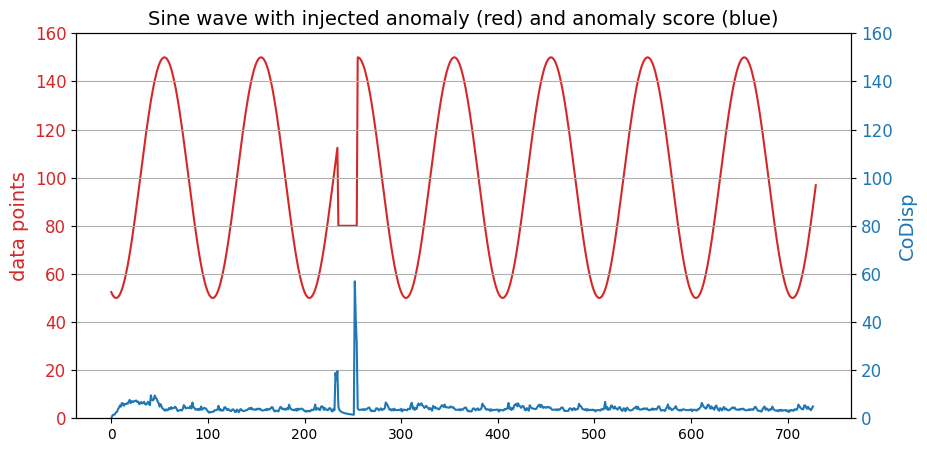

In [35]:
'''visualize the originil time series and the CoDisp score'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_ylabel('data points', color=color, size=14)
ax1.plot(sin, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.set_ylim(0,160)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CoDisp', color=color, size=14)
ax2.plot(pd.Series(avg_codisp).sort_index(), color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)
ax2.grid('off')
ax2.set_ylim(0, 160)
plt.title('Sine wave with injected anomaly (red) and anomaly score (blue)', size=14)
plt.show()


## <font color="FFC300">Comments</font>:
### The normal sine wave is depicted in red and the anomaly scores calculated by the Robust Random Cut Forest algorithm are put in blue. The anomaly is clearly visible as a deviation from the sine wave's pattern. The corresponding anomaly scores spike significantly at the anomaly's location, demonstrating the algorithm's effectiveness at detecting the anomaly in the streaming data.